In [1]:
import flashalgorithm as fc
import numpy as np
import dill as pickle
import itertools as itool
import pdb

In [2]:
data_hc = pickle.load(open('c1toc3_flashtable_80bar12C_nowater_quick.pkl', 'rb'))
all3_data_hc = [x for x in data_hc if (x[4] != []) and (x[4][1][0] > 1e-10) and (x[4][1][1] > 1e-10)
               and (np.sum((x[4][1][0] - x[4][1][1])**2) > 1e-6)]
all3_data = [x for x in data_hc if (x[4] != [])]

In [3]:
len(all3_data_hc)

15

In [4]:
def get_stable_phases(x):
    index_get = list()
    color = 'black'
    if np.sum((x[4][0][:, 0] - x[4][0][:, 1])**2) < 1e-6:
        if (x[4][1][0] > x[4][1][1]) and (x[4][1][0] > 1e-10):
            index_get.append(0)
        elif (x[4][1][1] > 1e-10):
            index_get.append(1)
    else:
        if x[4][1][0] > 1e-10:
            index_get.append(0)
        if x[4][1][1] > 1e-10:
            index_get.append(1)
    if len(index_get) == 2:
        if sorted(index_get) == [0,1]:
            color = 'blue'
        elif sorted(index_get) == [0,2]:
            color = 'green'
        elif sorted(index_get) == [0,3]:
            color = 'pink'
        elif sorted(index_get) == [0,4]:
            color = 'orange'
        elif sorted(index_get) == [1,3]:
            color = 'teal'
        elif sorted(index_get) == [1,4]:
            color = 'black'
        elif sorted(index_get) == [2,3]:
            color = 'olive'
        elif sorted(index_get) == [3,4]:
            color = 'brown'
        elif sorted(index_get) == [2,4]:
            color = 'purple'
        elif sorted(index_get) == [1,2]:
            color = 'gray'
        else:
            color = 'black'
    return index_get, color

In [5]:
def plot_tern_lines(x, 
                    tern_inds=[0,1,2], 
                    plot_ties=True, 
                    return_vals=False, 
                    include_xy=False, 
                    plot_1phase=False):
    z = x[4][0]
    if np.abs(np.sum(x[1][tern_inds]) - 1) < 1e-6:
        index_get, color = get_stable_phases(x)
        if include_xy:
            x, y = sr2xy(x[1][tern_inds[0]], x[1][tern_inds[2]])
            plt.plot(x, y, 'k.')
        if x[-1][-1] < 1e-3:
            if (len(index_get) == 2) and (color != 'black'):
                if len(z) == 3:
                    x1, y1 = sr2xy(z[0, index_get[0]], z[2, index_get[0]])
                    x2, y2 = sr2xy(z[0, index_get[1]], z[2, index_get[1]])
                else:
                    if x[1][2] == 0.0:
                        x1, y1 = sr2xy(z[0, index_get[0]], z[1, index_get[0]])
                        x2, y2 = sr2xy(z[0, index_get[1]], z[1, index_get[1]])
                    elif x[1][1] == 0.0:
                        x1, y1 = sr2xy(0, z[1, index_get[0]])
                        x2, y2 = sr2xy(0, z[1, index_get[1]])
                    elif x[1][3] == 0.0:
                        x1, y1 = sr2xy(z[0, index_get[0]], 0)
                        x2, y2 = sr2xy(z[0, index_get[1]], 0)
                        
                if plot_ties and not return_vals:
                    plt.plot([x1, x2], [y1, y2], '-', color=color)
                elif not return_vals:
                    plt.plot(x1, y1, 'r.')
                    plt.plot(x2, y2, 'b.')
                else:
                    return x1, x2, y1, y2
            elif len(index_get) == 3:
                x1, y1 = sr2xy(z[1, index_get[0]], z[0, index_get[0]])
                x2, y2 = sr2xy(z[1, index_get[1]], z[0, index_get[1]])
                x3, y3 = sr2xy(z[1, index_get[2]], z[0, index_get[2]])
                plt.plot([x1, x2, x3, x1], [y1, y2, y3, y1], '-r')
            elif len(index_get) == 1 and plot_1phase:
                if len(z) == 3:
                    x1, y1 = sr2xy(z[0, 0], z[2, 0])
                    x2, y2 = sr2xy(z[0, 1], z[2, 1])
                else:
                    if x[1][2] == 0.0:
                        x1, y1 = sr2xy(z[0, 0], z[1, 0])
                        x2, y2 = sr2xy(z[0, 1], z[1, 1])
                    elif x[1][1] == 0.0:
                        x1, y1 = sr2xy(0, z[1, 0])
                        x2, y2 = sr2xy(0, z[1, 1])
                    elif x[1][3] == 0.0:
                        x1, y1 = sr2xy(z[0, 0], 0)
                        x2, y2 = sr2xy(z[0, 1], 0)
                if return_vals:
                    return x1, x2, y1, y2

In [6]:
def sr2xy(c1, c2):
    x = c1 + 0.5 * c2
    y = c2 * (np.sqrt(3.0) / 2.0)
    return x, y
def xy2sr(x, y):
    c2 = y * (2.0 / np.sqrt(3.0))
    c1 = x - c2 * 0.5
    c3 = 1.0 - c1 - c2
    return c1, c2, c3

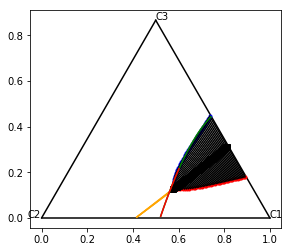

In [11]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
%matplotlib inline
plt.figure()
plt.clf()
brder = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
x0, y0 = sr2xy(brder[0][2], brder[0][0])
x1, y1 = sr2xy(brder[1][2], brder[1][0])
x2, y2 = sr2xy(brder[2][2], brder[2][0])
plt.plot([x0, x1], [y0, y1], 'k-')
plt.plot([x1, x2], [y1, y2], 'k-')
plt.plot([x2, x0], [y2, y0], 'k-')
phase_one = [[], []]
phase_two = [[], []]

tern_inds = [1, 2, 3]
error_count = 0
error_comp = list()
points = np.zeros([len(all3_data), 2])
for ii, x in enumerate(all3_data):
    x_pt, y_pt = sr2xy(x[1][1], x[1][3])
    points[ii, 0] = x_pt
    points[ii, 1] = y_pt
    if x[1][2] == 1e6:
        import pdb
        pdb.set_trace()
    try:
        x1, x2, y1, y2 = plot_tern_lines(x, tern_inds=tern_inds, return_vals=True, include_xy=False)
        phase_one[0].append(x1)
        phase_one[1].append(y1)
        phase_two[0].append(x2)
        phase_two[1].append(y2)
    except:
        error_count += 1
        error_comp.append(x)
plt.plot(phase_one[0], phase_one[1], 'r.')
plt.plot(phase_two[0], phase_two[1], 'b.')
plt.plot([phase_one[0], phase_two[0]], [phase_one[1], phase_two[1]], 'black')
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], '-', color='orange')

midpt_data = [[(x + y)/2 for x, y in zip(phase_one[0], phase_two[0])], 
              [(x + y)/2 for x, y in zip(phase_one[1], phase_two[1])]]
plt.plot(midpt_data[0], midpt_data[1], '-s', color='black')
z = np.polyfit(midpt_data[0], midpt_data[1], 2)
z = np.polyfit(phase_two[0], phase_two[1], 2)
p = np.poly1d(z)
x_p = np.linspace(0, 1, 300)
y_pred = p(x_p)
comps = zip(*xy2sr(x_p, y_pred))
valid_inds = [(np.min(comp) >=0) and (np.max(comp) <=1) and (np.sum(comp) == 1) for comp in comps]
plt.plot(x_p[valid_inds], y_pred[valid_inds], '-', color='green')
x_reduce, y_reduce = x_p[valid_inds], y_pred[valid_inds]
x_try = x_reduce[int(0.0*len(x_reduce)):int(0.4*len(x_reduce))]
y_try = y_reduce[int(0.0*len(x_reduce)):int(0.4*len(x_reduce))]
plt.plot(x_try, 
         y_try, '-', color='red')
# extra_data = pickle.load(open('c1c3_1comp.pkl', 'rb'))
# plot_tern_lines([0, 0, 0, 0, extra_data])
plt.axis('scaled')
plt.text(-0.06, 0, 'C2')
plt.text(1.0, 0, 'C1')
plt.text(0.5, 0.87, 'C3')



# plt.ylim([0, 0.25])
# plt.xlim([0.35, 0.65])

# plt.ylim([0.85, 0.88])
# plt.xlim([0.48, 0.52])
plt.savefig('V-LHC_80bar12C.svg')
plt.show()

In [15]:
error_comp

[[0,
  array([ 0.        ,  0.41497405,  0.5808032 ,  0.00422276]),
  ('methane', 'ethane', 'propane'),
  array([ 0.41497405,  0.5808032 ,  0.00422276]),
  [array([[ 0.41497503,  0.41497405],
          [ 0.58080224,  0.5808032 ],
          [ 0.00422274,  0.00422276]]),
   array([  1.00000000e-10,   1.00000000e+00]),
   array([[ 1.0000014 ,  1.        ],
          [ 0.99999902,  1.        ],
          [ 0.99999723,  1.        ]]),
   24,
   9.4036723392609687e-07]],
 [1,
  array([ 0.        ,  0.41784262,  0.57362152,  0.00853586]),
  ('methane', 'ethane', 'propane'),
  array([ 0.41784262,  0.57362152,  0.00853586]),
  [array([[ 0.41784359,  0.41784262],
          [ 0.57362059,  0.57362152],
          [ 0.00853582,  0.00853586]]),
   array([  1.00000000e-10,   1.00000000e+00]),
   array([[ 1.00000141,  1.        ],
          [ 0.99999902,  1.        ],
          [ 0.99999722,  1.        ]]),
   25,
   8.7529576437226007e-07]],
 [2,
  array([ 0.        ,  0.42070857,  0.56643721,  0.0128

In [16]:
np.sum(zip(*xy2sr(x_try, y_try)), axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [17]:
zip(*[x_p[valid_inds], y_pred[valid_inds]])

[(0.52173913043478259, 0.0075110750988089947),
 (0.52508361204013376, 0.017311345642402554),
 (0.52842809364548493, 0.027013200692706629),
 (0.5317725752508361, 0.03661664024971989),
 (0.53511705685618727, 0.046121664313442778),
 (0.53846153846153844, 0.055528272883874852),
 (0.5418060200668896, 0.064836465961016998),
 (0.54515050167224077, 0.074046243544868773),
 (0.54849498327759194, 0.083157605635429732),
 (0.55183946488294311, 0.092170552232700764),
 (0.55518394648829428, 0.10108508333668054),
 (0.56187290969899661, 0.1186188990647703),
 (0.56521739130434778, 0.1272381836888794),
 (0.56856187290969895, 0.13575905281969813),
 (0.57190635451505012, 0.14418150645722605),
 (0.57525083612040129, 0.15250554460146404),
 (0.57859531772575246, 0.16073116725241121),
 (0.58193979933110362, 0.1688583744100689),
 (0.58528428093645479, 0.17688716607443489),
 (0.58862876254180596, 0.18481754224551139),
 (0.59197324414715713, 0.19264950292329663),
 (0.5953177257525083, 0.20038304810779239),
 (0.59

In [18]:
water_frac = 0.1
use_comps = [np.asarray([water_frac, (1 - water_frac)*c[0], (1 - water_frac)*c[2], (1 - water_frac)*c[1]]) for c in zip(*xy2sr(x_try, y_try))]

In [19]:
use_comps

[array([ 0.1       ,  0.46566235,  0.42653191,  0.00780574]),
 array([ 0.1       ,  0.46358001,  0.41842951,  0.01799048]),
 array([ 0.1       ,  0.46154881,  0.41037824,  0.02807294]),
 array([ 0.1       ,  0.45956875,  0.40237812,  0.03805313]),
 array([ 0.1       ,  0.45763983,  0.39442913,  0.04793104]),
 array([ 0.1       ,  0.45576205,  0.38653128,  0.05770667]),
 array([ 0.1       ,  0.4539354 ,  0.37868457,  0.06738003]),
 array([ 0.1       ,  0.45215989,  0.37088899,  0.07695111]),
 array([ 0.1       ,  0.45043553,  0.36314456,  0.08641992]),
 array([ 0.1       ,  0.44876229,  0.35545126,  0.09578645]),
 array([ 0.1      ,  0.4471402,  0.3478091,  0.1050507]),
 array([ 0.1       ,  0.44404943,  0.33267819,  0.12327238]),
 array([ 0.1       ,  0.44258075,  0.32518945,  0.1322298 ]),
 array([ 0.1       ,  0.44116321,  0.31775184,  0.14108495]),
 array([ 0.1       ,  0.43979681,  0.31036537,  0.14983782]),
 array([ 0.1       ,  0.43848155,  0.30303004,  0.15848841]),
 array([ 0.1

In [20]:
# pickle.dump(use_comps, open('80bar12C_complist_find4phase4.pkl', 'w'))

In [21]:
water_fracs = [0.2, 0.6, 0.96, 0.98]
use_comps = []
for water_frac in water_fracs:
    for c in zip(*xy2sr(x_try, y_try)):
        for ii in range(20):
            use_comps.append([water_frac, 
                              (1 - water_frac)*(c[0] + np.random.normal(scale=0.05)),
                              (1 - water_frac)*(c[2] + np.random.normal(scale=0.05)),
                              (1 - water_frac)*(c[1] + np.random.normal(scale=0.05))])
use_comps = np.asarray(use_comps)
use_comps = use_comps / np.sum(use_comps, axis=1)[:, np.newaxis]

In [23]:
use_comps.shape

(1920, 4)

In [24]:
pickle.dump(use_comps, open('80bar12C_complist_find4phase7.pkl', 'w'))